# Systemy uczące się - Zad. dom. 11: Algorytm oczekiwanie-maksymalizacja

### Autor rozwiązania
Uzupełnij poniższe informacje umieszczając swoje imię i nazwisko oraz numer indeksu:

In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin

NAME = "Mikołaj Nowak"
ID = "151813"

### Ćwiczenie 1 - implementacja k-means
Wygeneruj zbiór danych

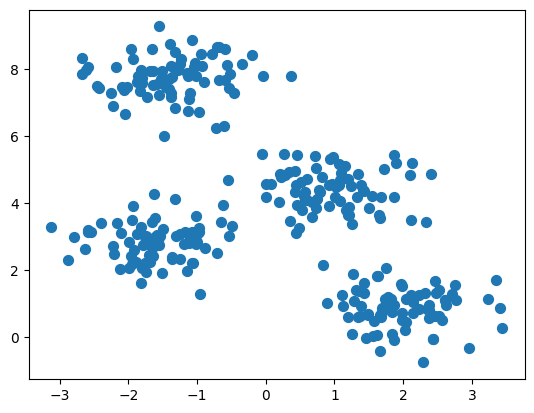

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4,
                  cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)

Algorytm k-średnich, zaraz po inicjalizacji początkowych wartości centroidów, składa się z 2 podstawowych, powtarzanych iteracyjnie kroków:
- *expectation* - przypisanie każdego elementu zbiory danych do najbliższego centroidu
- *maximization* - aktualizacja centroidów. Centroid jest wyznaczany jako średnia arytmetyczna po wszystkich przypisanych do niego punktach

Zaimplementuj ten algorytm. W implementacji może być pomocna funkcja `pairwise_distances_argmin` [[dokumentacja]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html)

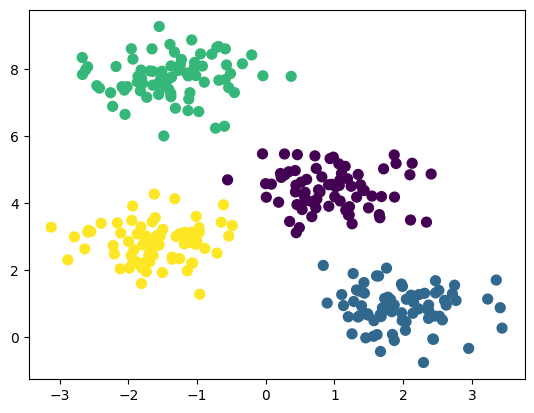

In [3]:
def find_clusters(x: np.ndarray, k: int) -> np.ndarray:
    """Znajduje skupienia algorytmem k-średnich
    
    Na wyjście zwracany jest wektor zawierający przypisania każdego elementu z x do skupienia
    np. [0,1,1] dla 3-elementowego X i k=2 oznacza że pierwszy element należy
    do grupy pierwszej, a element drugi i trzeci należą do grupy drugiej.
    
    Arguments:
        x (np.ndarray): zbiór danych
        k (int): liczba szukanych grup
        
    Returns:
        np.ndarray: wektor zawierający przypisania każdego elementu z x do skupienia   
    """

    rng = np.random.default_rng()
    centroids = x[rng.choice(len(x), size=k, replace=False)]

    while True:
        labels = pairwise_distances_argmin(x, centroids)
        new_centroids = np.array([
            x[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels


labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

Przetestuj działanie metody dla innych danych:

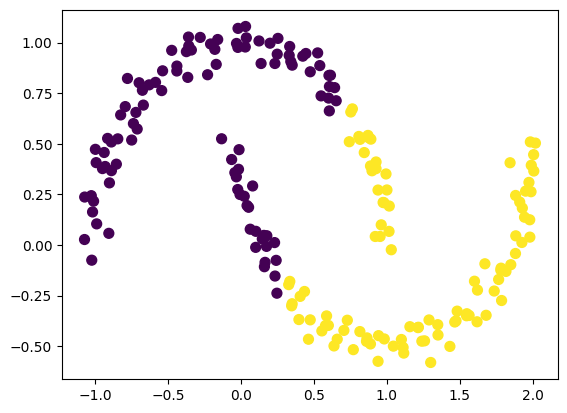

In [4]:
from sklearn.datasets import make_moons, make_circles
X, _ = make_moons(200, noise=.05, random_state=0)
labels = find_clusters(X, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

oraz

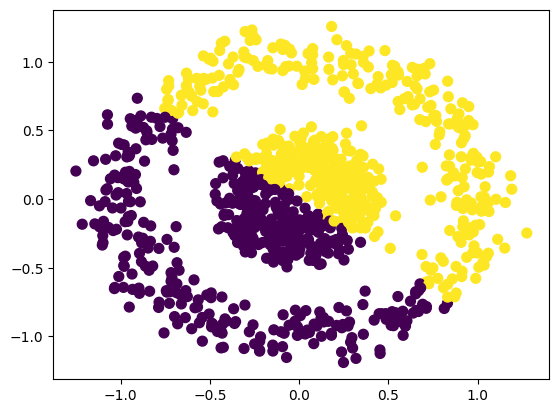

In [5]:
X,_ = make_circles(n_samples=1000, factor=0.3, noise=0.1)
labels = find_clusters(X, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

czy algorytm k-średnich potrafi je zgrupować w sposób zgodny z oczekiwaniami? Jakie rodzaje kształtów potrafi wykrywać algorytm k-średnich?

Algorytm k-średnich potrafi zgrupować dane w sposób zgodny z oczekiwaniami tylko wtedy, gdy skupienia są w przybliżeniu kuliste, mają podobny rozmiar i są dobrze odseparowane.

Nie radzi sobie dobrze z:

- skupieniami o nieregularnych kształtach (np. w kształcie pierścienia czy spirali),
- skupieniami o różnej gęstości,
- nachodzącymi na siebie klastrami.

Przetestuj działanie profesjonalnej implementacji algorytm k-średnich z pakietu sklearn

In [6]:
from sklearn.cluster import KMeans

ponieważ problem jest nienadzorowany, funkcja `fit()` przyjmie tylko jeden argument (`X`). Liczbę grup możesz określić poprzez parametr konstruktora `n_clusters = 5`. Przypisanie obserwacji do poszczególnych grup możesz odczytać z włąściwości `labels_` wytrenowanego obiektu `KMeans`. Narysuj wynik grupowania.

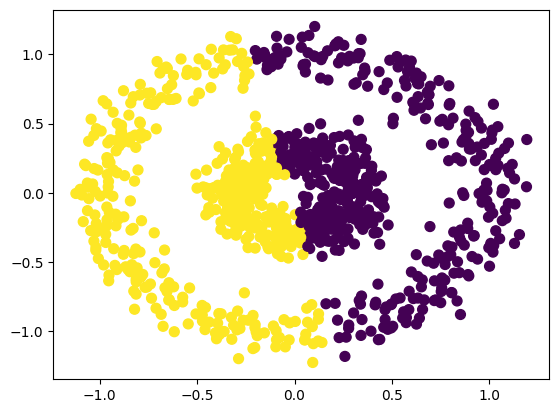

In [7]:
X, _ = make_circles(n_samples=1000, factor=0.3, noise=0.1)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

O algorytmie k-średnich często mówi się, że wykrywa skupiska sferyczne.

In [8]:
from helpers import get_quasispherical_data
X = get_quasispherical_data()

Sprawdź tę hipotezę na podanych trudniejszych danych sferycznych (no właśnie czy są one sferyczne?). Czy nawet gdyby wybrać centroidy jako prawdziwe centra skupisk, otrzymalibyśmy prawidłowe grupowanie? Dlaczego?

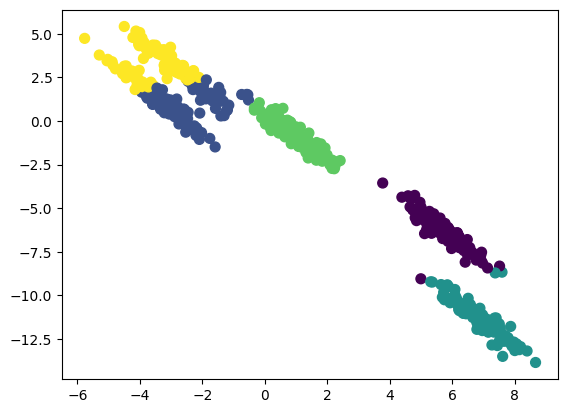

In [9]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

Dane nie są do końca sferyczne — są rozciągnięte wzdłuż jednej osi w jednym wymiarze. Dodatkowo środki niektórych grup znajdują się bliżej siebie niż krańce tych grup, więc nawet gdybyśmy wybrali centroidy idealnie w centrach skupisk, to algorytm k-średnich i tak przypisałby część punktów do niewłaściwych grup. W efekcie zawsze otrzymalibyśmy błędny wynik grupowania, ponieważ k-średnich zakłada skupiska sferyczne i oddzielone od siebie, a tutaj tak nie jest.

**Ćwiczenia**
- Uruchom swój algorytm kilka razy - czy za każdym razem dostajesz ten sam wynik? Co ci to mówi o specyfice rozwiązowanego problemu i algortmie k-średnich jako algorytmie optymalizacyjnym?
- Twój algorytm uruchamiałeś z apriori znaną liczbą grup $k=4$, przetestuj działanie algorytmu dla $k=5$. Uruchom swój algorytm kilka razy - czy za każdym razem dostajesz ten sam wynik? Co ci to mówi o algortmie k-średnich jako algorytmie optymalizacyjnym?
- Jak w praktyce możemy próbować choć trochę ograniczyć problem algorytmu dot. utykania w minimach lokalnych?

Aby ograniczyć problem utknięcia w minimach lokalnych w algorytmie k-średnich, można:

- Uruchamiać algorytm wielokrotnie z różnymi losowymi inicjalizacjami i wybierać najlepszy wynik.
- Dokonywać mutacji np. zmiana etykiet kilku punktów.
- Normalizować dane, by poprawić ich właściwości geometryczne.


## Zadanie 2 - parametry wielowymiarowego rozkładu normalnego

Poniższy kod służy do rysowania dwuwymiarowego rozkładu normalnego o wektorze średnich $[0,0]$ i macierzy kowariancji równej $[[1, 0], [0, 1]]$

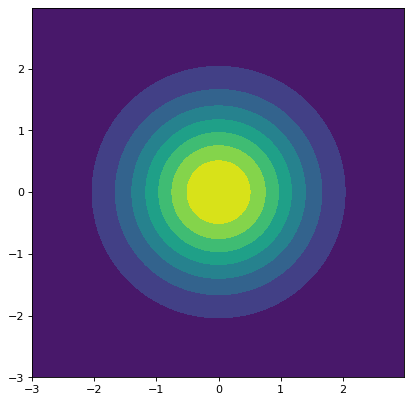

In [10]:
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure

figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[1, 0], [0, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmienisz wektor średnich  na np. $[1,0]$


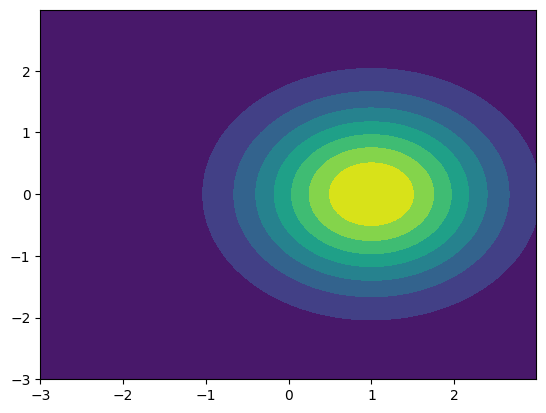

In [11]:
normal = multivariate_normal([1, 0], [[1, 0], [0, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na wielokrotność macierzy jednostkowej. (Warto wrócić do oryginalnego ustawienia wektora średnich, aby wycentrować wykres)

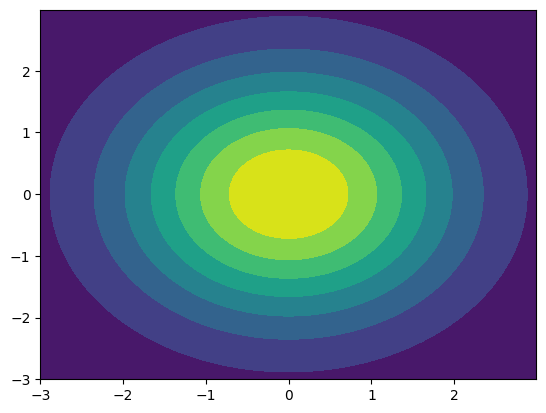

In [12]:
normal = multivariate_normal([0, 0], [[2, 0], [0, 2]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na inną macierz diagonalną

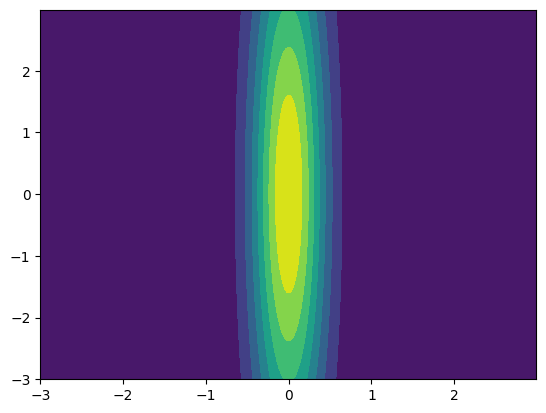

In [13]:
normal = multivariate_normal([0, 0], [[0.1, 0], [0, 10]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na inną macierz symetryczną np. $[[1, 0.9], [0.9, 1]]$

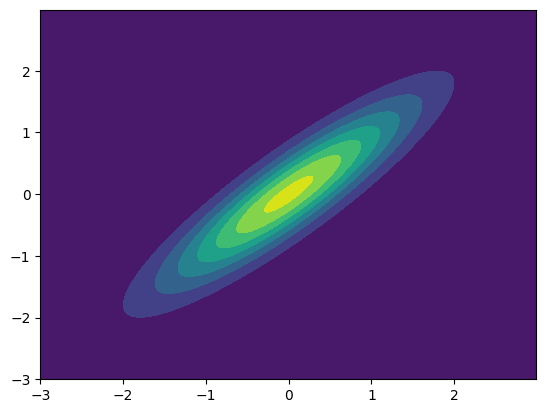

In [14]:
normal = multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Macierz kowariancji musi być symetryczna, jednak sama własność symetryczności macierzy nie wystarcza. Spróbuj zwizualizować rozkład o macierzy $[[1, 1], [1, 1]]$. Dlaczego nie jest to możliwe? Wyjaśnij używając zarówno formalizmu matematycznego jak i intuicji. (Jak wyglądałby wykres takiego rozkładu?)

In [15]:
# normal = multivariate_normal([0, 0], [[1, 1], [1, 1]])
# densities = normal.pdf(points)
# plt.contourf(x, y, densities)

Jeśli macierz jest tylko semidefinitywna, rozkład jest zdegenerowany (ma wymiar niższy niż przestrzeń), co powoduje problemy w implementacji i wizualizacji.

Rozkład o takiej macierzy kowariancji nie rozkładałby się na całej płaszczyźnie, tylko na prostej y=x

Korzystając z funkcji `multivariate_normal`, zwizualizuj mieszaninę dwóch rozkładów normalnych:
$$P(x) = \tau N(x; \mu_1, \Sigma_1) + (1-\tau) N(x; \mu_2, \Sigma_2) $$

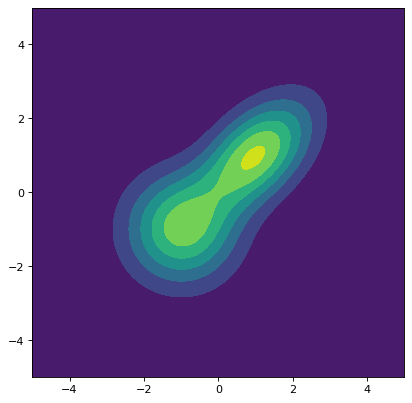

In [16]:
plt.figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-5:5:.01, -5:5:.01]
points = np.dstack((x, y))

mu1 = [-1, -1]
sigma1 = [[1, 0], [0, 1]]
normal1 = multivariate_normal(mu1, sigma1)
mu2 = [1, 1]
sigma2 = [[1, 0.5], [0.5, 1]]
normal2 = multivariate_normal(mu2, sigma2)

tau = 0.5
densities = tau * normal1.pdf(points) + (1 - tau) * normal2.pdf(points)
plt.contourf(x, y, densities)

**Ćwiczenia**
1. Poeksperymentuj z różnymi ustawieniami mieszaniny. Na co wpływa parametr $\tau$?
2. Rozważając mieszaninę rozkładów normalnych o dowolnej liczbie komponentów - czy istnieją rozkłady, których nie można zamodelować? Odpowiedź uzasadnij używając zdobytych intuicji.

1. Parametr $\tau$ pozwala kontrolować proporcję (częstość) występowania każdego komponentu w całej mieszaninie.

2. Mieszaniny rozkładów normalnych są bardzo elastyczne** i potrafią aproksymować praktycznie dowolny rozkład ciągły z dokładnością dowolnie dużą, o ile użyjemy odpowiednio dużą liczbę komponentów. 

## Zadanie 3 - EM dla mieszaniny jednowymiarowej
Dane są dane wygenerowane z poniższej mieszaniny rozkładów normalnych:

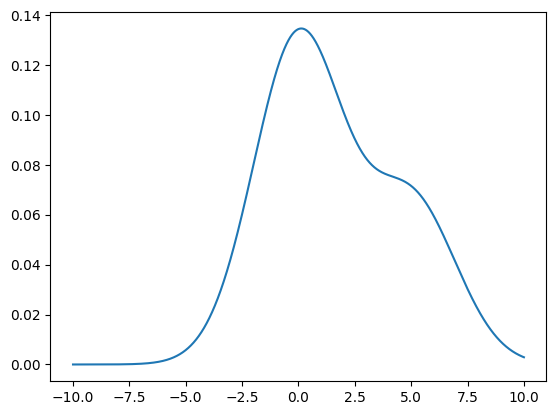

In [17]:
from scipy.stats import norm

x_axis = np.arange(-10, 10, 0.001)
plt.plot(x_axis, 0.66 * norm.pdf(x_axis, 0, 2) + 0.33 * norm.pdf(x_axis, 5, 2))
plt.show()

data = np.concatenate((np.random.normal(0, 2, 66), np.random.normal(5, 2, 33)))

Zwizualizuj dane na histogramie. Zwróć uwagę, że dobór odpowiednich $\mu_1, \mu_2, \sigma_1, \sigma_2$ na podstawie danych nie jest oczywisty

(array([ 4.,  9., 11., 15., 17.,  8.,  8., 11., 10.,  6.]),
 array([-5.15122849, -3.82537371, -2.49951892, -1.17366414,  0.15219064,
         1.47804542,  2.8039002 ,  4.12975498,  5.45560976,  6.78146454,
         8.10731933]),
 <BarContainer object of 10 artists>)

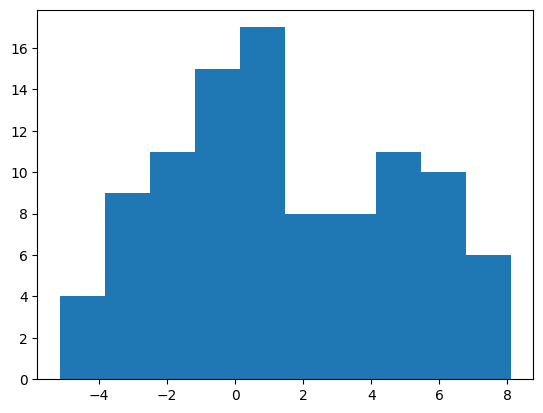

In [18]:
plt.hist(data)

Zaimplementuj algorytm EM dla powyższego problemu. Zwizualizuj kolejne kroki algorytmu (tj. narysuj wykres mikstury co kilka iteracji)

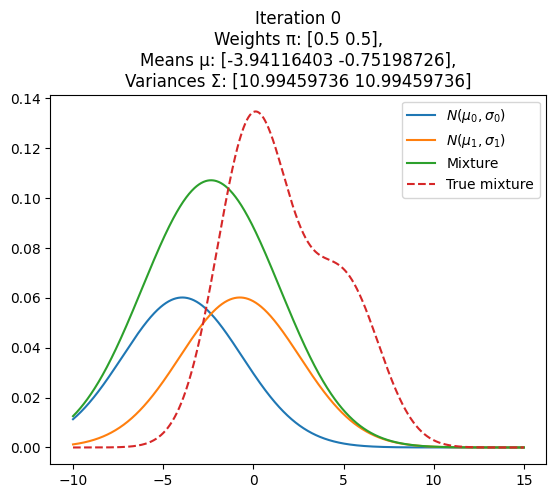

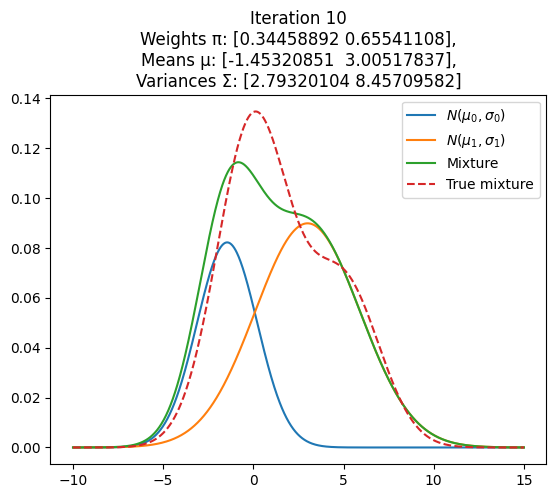

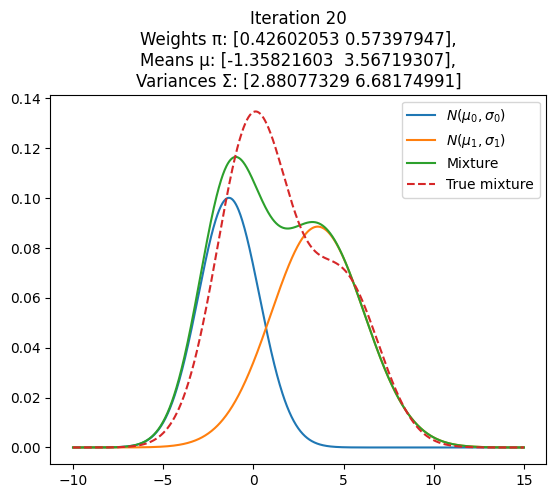

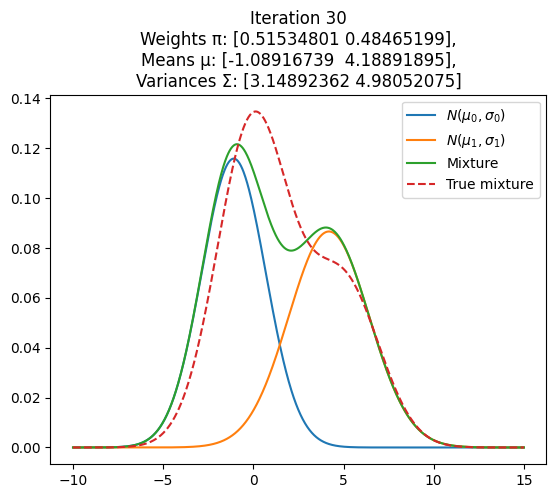

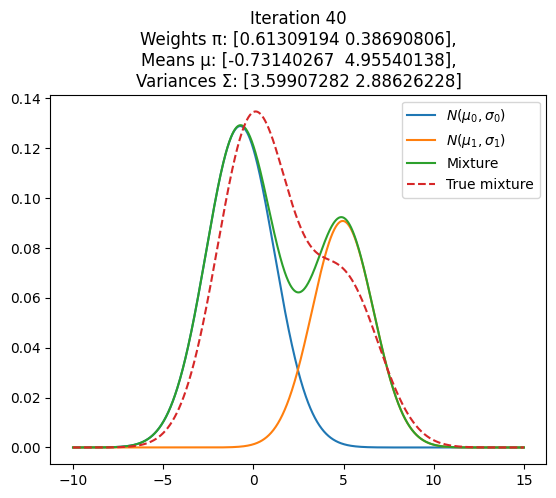

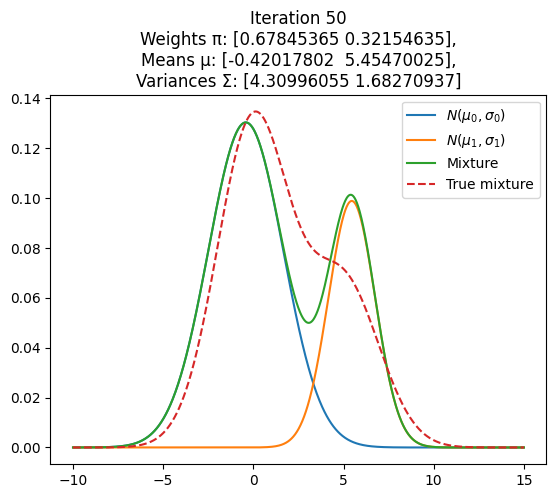

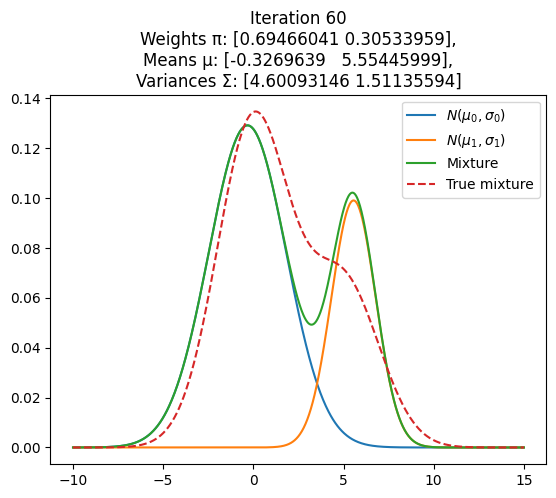

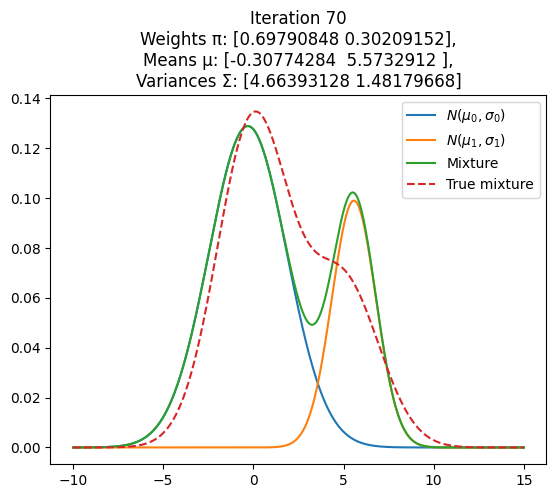

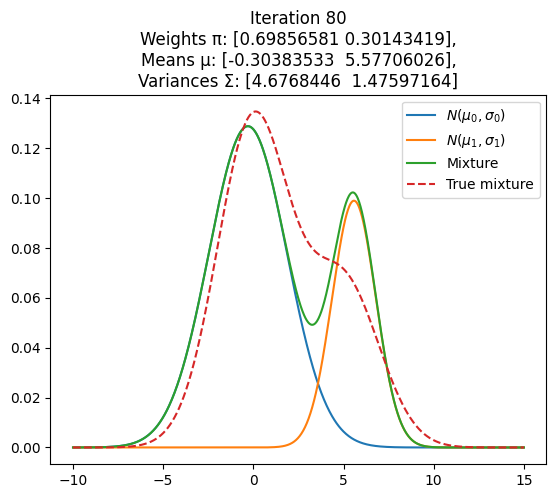

Convergence reached after 88 iterations.


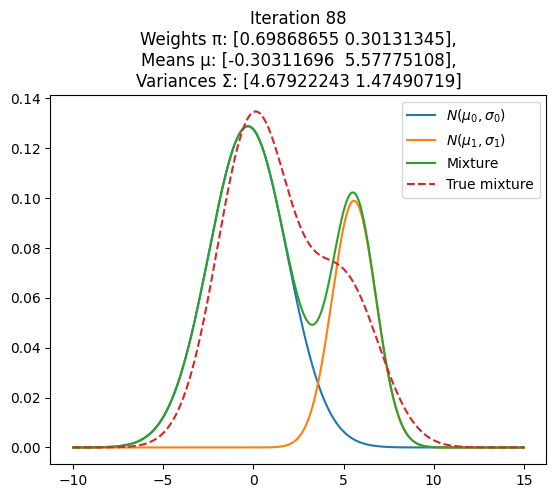

In [19]:
x_axis = np.linspace(-10, 15, 1000)

def plot_gmm(iteration, k, weights, means, variances, freq=10):
    if iteration % freq != 0:
        return

    plt.figure()
    plt.title(f'Iteration {iteration}\n' +
              f'Weights π: {weights.ravel()},\n' +
              f'Means μ: {means.ravel()},\n' +
              f'Variances Σ: {variances.ravel()}')

    mixture_pdf = np.zeros_like(x_axis)
    for i in range(k):
        component_pdf = weights[i] * norm.pdf(x_axis, means[i], np.sqrt(variances[i]))
        mixture_pdf += component_pdf
        plt.plot(x_axis, component_pdf, label=f'$N(μ_{i}, σ_{i})$')
    
    plt.plot(x_axis, mixture_pdf, label='Mixture')
    true_pdf = 0.66 * norm.pdf(x_axis, 0, 2) + 0.33 * norm.pdf(x_axis, 5, 2)
    plt.plot(x_axis, true_pdf, label='True mixture', linestyle='--')

    plt.legend(loc='upper right')
    plt.show()

def em_gmm_1d(X, k, max_iters=1000, tol=1e-6, plot_freq=10):
    n = len(X)
    X = X.reshape(1, n)

    weights = np.ones((k, 1)) / k
    means = np.random.choice(X.flatten(), k).reshape(k, 1)
    variances = np.var(X) * np.ones((k, 1))

    for iteration in range(max_iters):
        plot_gmm(iteration, k, weights, means, variances, freq=plot_freq)

        pdf_values = np.zeros((k, n))
        for i in range(k):
            pdf_values[i] = norm.pdf(X, means[i], np.sqrt(variances[i]))
        
        weighted_pdfs = weights * pdf_values
        responsibilities = weighted_pdfs / np.sum(weighted_pdfs, axis=0)

        Nk = np.sum(responsibilities, axis=1).reshape(k, 1)
        new_weights = Nk / n
        new_means = (responsibilities @ X.T) / Nk
        new_variances = np.zeros((k, 1))
        for i in range(k):
            diff = X - new_means[i]
            new_variances[i] = np.sum(responsibilities[i] * diff**2) / Nk[i]

        if np.allclose(weights, new_weights, atol=tol) and \
           np.allclose(means, new_means, atol=tol) and \
           np.allclose(variances, new_variances, atol=tol):
            print(f'Convergence reached after {iteration} iterations.')
            break

        weights, means, variances = new_weights, new_means, new_variances

    plot_gmm(iteration, k, weights, means, variances, freq=1)
    return weights, means, variances

weights, means, variances = em_gmm_1d(data, k=2, tol=1e-4, plot_freq=10)

Skorzystaj z gotowej implementacji EM-GMM w pakiecie `sklearn` dla danych z elipsami:

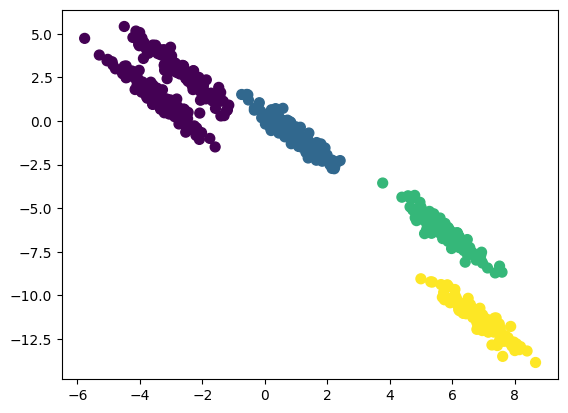

In [20]:
from sklearn.mixture import GaussianMixture
from helpers import get_quasispherical_data
X = get_quasispherical_data()
gmm = GaussianMixture(n_components=5)
labels = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)

Czy algorytm EM lepiej poradził sobie z tymi danymi niż k-Means?

Nadal robi błędy, ale działa zdecydowanie lepiej niż k-Means

Wykonaj proces strojenia parametru $K$ metody EM-GMM poprzez narysowanie wykresu funkcji wiarygodności dla różnych $K$ na zbiorze uczącym i testowym. Sprawdź czy wybrana liczba elementów mikstury odpowiada intuicji.

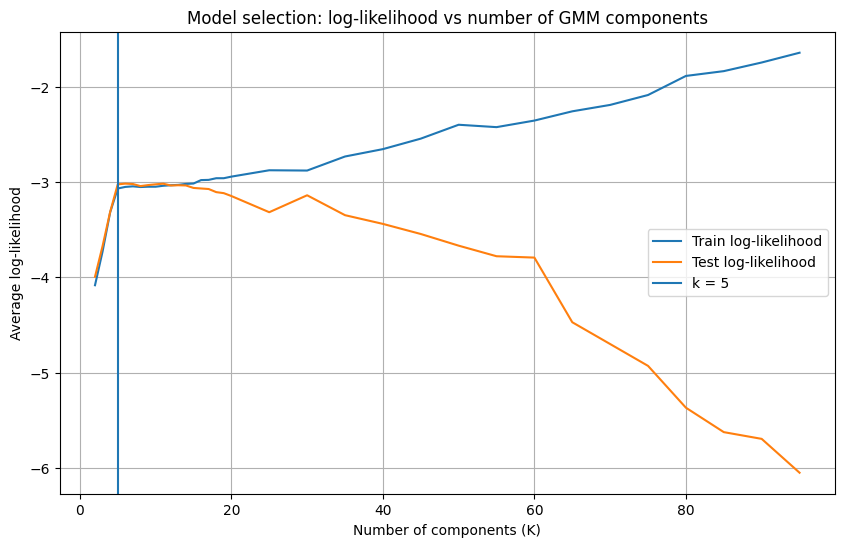

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

ks = list(np.arange(2, 20)) + list(np.arange(20, 100, 5))
train_log_likelihoods = []
test_log_likelihoods = []

for k in ks:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_train)
    
    train_log_likelihoods.append(gmm.score(X_train))
    test_log_likelihoods.append(gmm.score(X_test))

plt.figure(figsize=(10,6))
plt.plot(ks, train_log_likelihoods, label='Train log-likelihood')
plt.plot(ks, test_log_likelihoods, label='Test log-likelihood')
plt.axvline(5, label='k = 5')
plt.xlabel('Number of components (K)')
plt.ylabel('Average log-likelihood')
plt.title('Model selection: log-likelihood vs number of GMM components')
plt.legend()
plt.grid(True)
plt.show()

Tak, 5 jest najlepszą liczbą mikstur.